## Capstone Project
###  Household Income and Expenditure
#### By Sajeewa Batuwitage, 01 December 2020

In [1]:
#Import Libraries

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split,cross_val_score, cross_validate
from statsmodels.sandbox.regression.predstd import wls_prediction_std

Data Source

In [227]:
df = pd.read_csv('C:\\Users\\Sajeewa\\Downloads\\Python\\LAB\\data\\Family_Income_and_Expenditure.csv')
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [5]:
df.isnull().sum()

Total Household Income                              0
Region                                              0
Total Food Expenditure                              0
Main Source of Income                               0
Agricultural Household indicator                    0
Bread and Cereals Expenditure                       0
Total Rice Expenditure                              0
Meat Expenditure                                    0
Total Fish and  marine products Expenditure         0
Fruit Expenditure                                   0
Vegetables Expenditure                              0
Restaurant and hotels Expenditure                   0
Alcoholic Beverages Expenditure                     0
Tobacco Expenditure                                 0
Clothing, Footwear and Other Wear Expenditure       0
Housing and water Expenditure                       0
Imputed House Rental Value                          0
Medical Care Expenditure                            0
Transportation Expenditure  

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Household Income,41544.0,247555.584802,286880.522653,11285.0,104895.00,164079.5,291138.50,11815988.0
Total Food Expenditure,41544.0,85099.158194,51637.947682,2947.0,51017.25,72985.5,105635.50,827565.0
Agricultural Household indicator,41544.0,0.429858,0.676666,0.0,0.00,0.0,1.00,2.0
Bread and Cereals Expenditure,41544.0,25133.723642,13466.482984,0.0,16556.00,23324.0,31439.00,765864.0
Total Rice Expenditure,41544.0,18195.825005,11727.224350,0.0,11020.00,16620.0,23920.00,758326.0
Meat Expenditure,41544.0,10540.072574,10497.727757,0.0,3353.75,7332.5,14292.00,261566.0
Total Fish and marine products Expenditure,41544.0,10529.318337,7812.201613,0.0,5504.00,8695.0,13388.00,188208.0
Fruit Expenditure,41544.0,2550.474990,2969.752879,0.0,1024.75,1820.0,3100.00,273769.0
Vegetables Expenditure,41544.0,5006.918568,3300.175236,0.0,2873.00,4314.0,6304.25,74800.0
Restaurant and hotels Expenditure,41544.0,15436.566075,23705.195929,0.0,1930.00,7314.0,19921.25,725296.0


In [7]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

Select the non important columns regards to expenditures

In [8]:
coln_0 = ['Region', 'Main Source of Income', 'Agricultural Household indicator',
       'Imputed House Rental Value','Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Completed',
       'Household Head Job or Business Indicator', 'Household Head Occupation',
       'Household Head Class of Worker', 'Type of Household',
       'Total Number of Family members',
       'Members with age less than 5 year old',
       'Members with age 5 - 17 years old',
       'Total number of family members employed', 'Type of Building/House',
       'Type of Roof', 'Type of Walls', 'House Floor Area', 'House Age',
       'Number of bedrooms', 'Tenure Status', 'Toilet Facilities',
       'Electricity', 'Main Source of Water Supply', 'Number of Television',
       'Number of CD/VCD/DVD', 'Number of Component/Stereo set',
       'Number of Refrigerator/Freezer', 'Number of Washing Machine',
       'Number of Airconditioner', 'Number of Car, Jeep, Van',
       'Number of Landline/wireless telephones', 'Number of Cellular phone',
       'Number of Personal Computer', 'Number of Stove with Oven/Gas Range',
       'Number of Motorized Banca', 'Number of Motorcycle/Tricycle']

In [9]:
# Drop non-important columns
dfnum = df.drop(columns = coln_0, axis=1)
dfnum

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,2880,36200,34056,7200,19370
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,5700,29300,9150,1500,0
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,420,425,6450,500,0
3,107589,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,660,300,3762,500,15580
4,189322,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,2100,0,8472,1000,18887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,44875,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,294,2124,600,50,3978,2500,94120
41540,137320,31157,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,890,2568,1560,1550,6090,1500,78270
41541,133171,45882,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,540,2040,1080,0,3570,500,54965
41542,129500,81416,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,314,2412,1020,5295,5760,1000,95785


Experiment/Exploratory Analysis

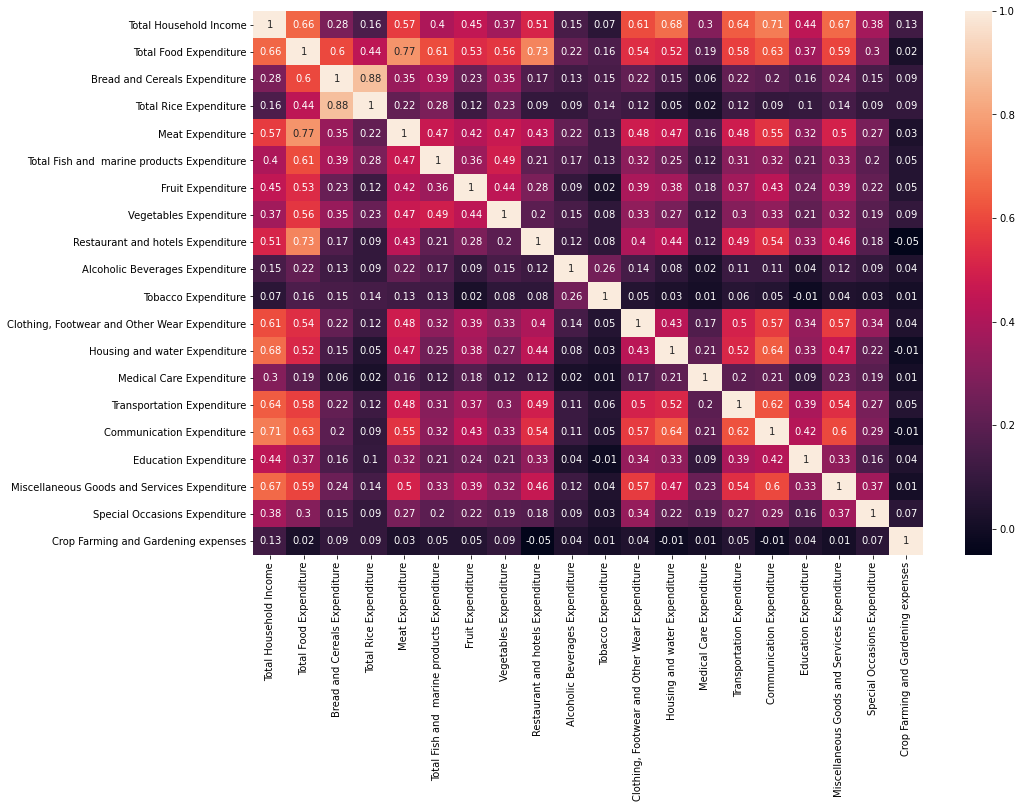

In [10]:
correlation_matrix = dfnum.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

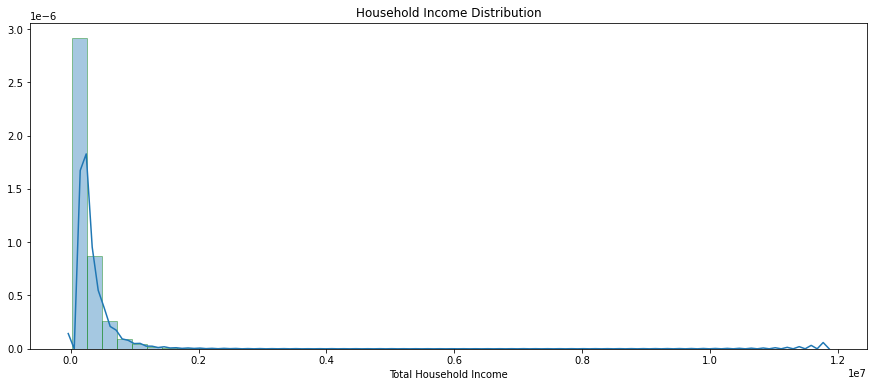

In [179]:
plt.figure(figsize=(15,6))
#plt.tight_layout()
sns.distplot(df['Total Household Income'],kde = True,hist_kws=dict(edgecolor="g"))
plt.title('Household Income Distribution')
plt.show()

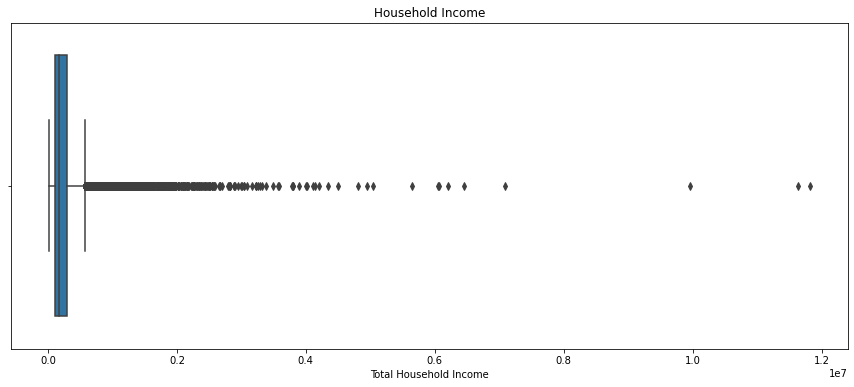

In [12]:
plt.figure(figsize=(15,6))
plt.title('Household Income')
sns.boxplot(df['Total Household Income'])

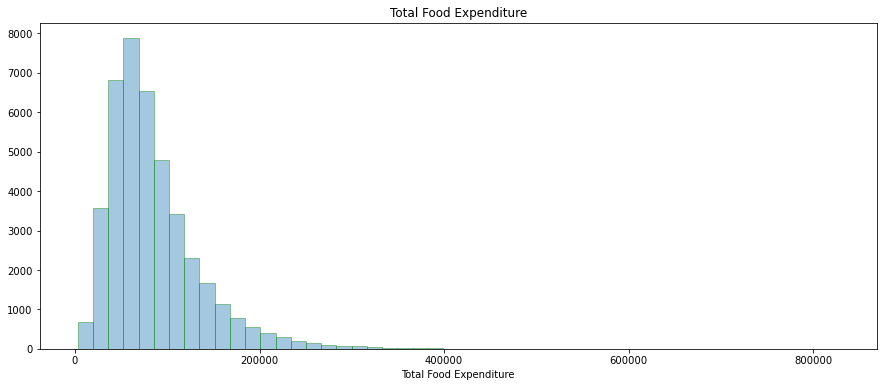

In [180]:
#sns.color_palette(palette='dark')
plt.figure(figsize=(15,6))
plt.tight_layout()
sns.distplot(df['Total Food Expenditure'],kde = False,hist_kws=dict(edgecolor="g"))
plt.title('Total Food Expenditure')
plt.show()

Text(0.5, 0.98, 'Income vs Expenditure')

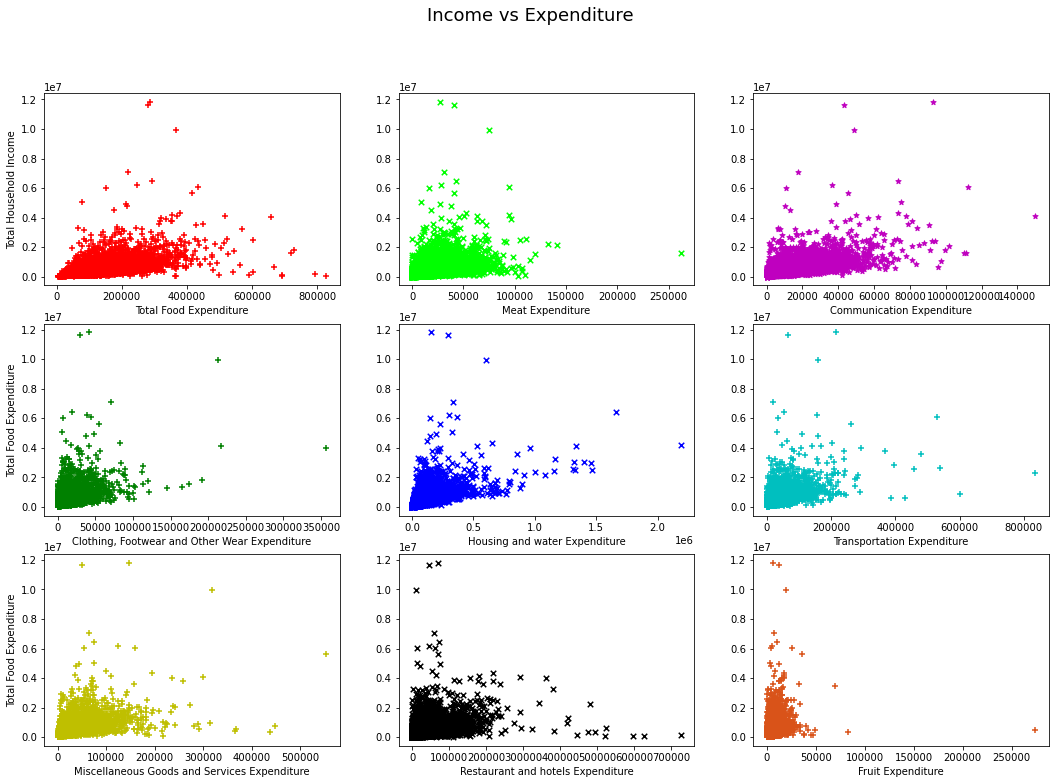

In [14]:
# For 
fig, ax = plt.subplots(3,3, figsize=(18,12))
#ROW1
ax[0,0].scatter(df['Total Food Expenditure'],df['Total Household Income'], 30,'r','+')
ax[0,0].set_xlabel('Total Food Expenditure')
ax[0,0].set_ylabel('Total Household Income')
ax[0,1].scatter(df['Meat Expenditure'],df['Total Household Income'],  30,'#00FF00','x')
ax[0,1].set_xlabel('Meat Expenditure')
ax[0,2].scatter(df['Communication Expenditure'],df['Total Household Income'],30,'m','*' )
ax[0,2].set_xlabel('Communication Expenditure')
#ROW2
ax[1,0].scatter(df['Clothing, Footwear and Other Wear Expenditure'],df['Total Household Income'],30,'g','+' )
ax[1,0].set_xlabel('Clothing, Footwear and Other Wear Expenditure')
ax[1,0].set_ylabel('Total Food Expenditure')
ax[1,1].scatter(df['Housing and water Expenditure'],df['Total Household Income'], 30,'b','x')
ax[1,1].set_xlabel('Housing and water Expenditure')
ax[1,2].scatter( df['Transportation Expenditure'],df['Total Household Income'],30,'c','+')
ax[1,2].set_xlabel('Transportation Expenditure')
#ROW2
ax[2,0].scatter( df['Miscellaneous Goods and Services Expenditure'],df['Total Household Income'], 30,'y','+')
ax[2,0].set_xlabel('Miscellaneous Goods and Services Expenditure')
ax[2,0].set_ylabel('Total Food Expenditure')
ax[2,1].scatter(df['Restaurant and hotels Expenditure'],df['Total Household Income'],30,'k','x')
ax[2,1].set_xlabel('Restaurant and hotels Expenditure')
ax[2,2].scatter(df['Fruit Expenditure'],df['Total Household Income'],30,'#D95319','+')
ax[2,2].set_xlabel('Fruit Expenditure')
fig.suptitle("Income vs Expenditure", fontsize=18)

In [15]:
df.columns

Index(['Total Household Income', 'Region', 'Total Food Expenditure',
       'Main Source of Income', 'Agricultural Household indicator',
       'Bread and Cereals Expenditure', 'Total Rice Expenditure',
       'Meat Expenditure', 'Total Fish and  marine products Expenditure',
       'Fruit Expenditure', 'Vegetables Expenditure',
       'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure',
       'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
       'Housing and water Expenditure', 'Imputed House Rental Value',
       'Medical Care Expenditure', 'Transportation Expenditure',
       'Communication Expenditure', 'Education Expenditure',
       'Miscellaneous Goods and Services Expenditure',
       'Special Occasions Expenditure', 'Crop Farming and Gardening expenses',
       'Total Income from Entrepreneurial Acitivites', 'Household Head Sex',
       'Household Head Age', 'Household Head Marital Status',
       'Household Head Highest Grade Compl

In [205]:
df[df['Household Head Age']<15].T

,3315,6036,7302,32111,38306
Total Household Income,79825,195400,86800,70500,99480
Region,IVA - CALABARZON,III - Central Luzon,V - Bicol Region,XII - SOCCSKSARGEN,NCR
Total Food Expenditure,47715,89387,48629,36791,64858
Main Source of Income,Enterpreneurial Activities,Other sources of Income,Wage/Salaries,Other sources of Income,Wage/Salaries
Agricultural Household indicator,1,0,0,0,2
Bread and Cereals Expenditure,19051,25799,28981,12636,23452
Total Rice Expenditure,12195,17014,25425,5330,14523
Meat Expenditure,7740,22126,3594,5700,8130
Total Fish and marine products Expenditure,8296,4372,4299,4892,5404
Fruit Expenditure,690,2730,918,1440,740


In [181]:
print(df.groupby(['Main Source of Income'])['Total Household Income'].count())

Main Source of Income
Enterpreneurial Activities    10320
Other sources of Income       10836
Wage/Salaries                 20388
Name: Total Household Income, dtype: int64


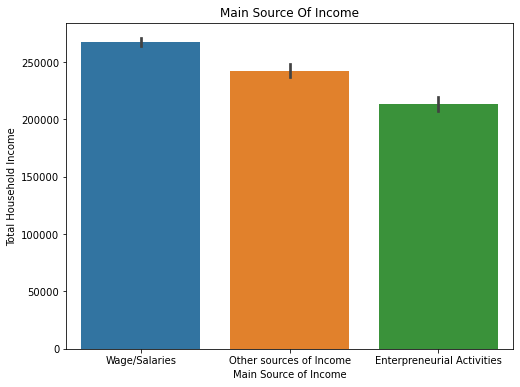

In [182]:
plt.figure(figsize=(8,6))
plt.title('Main Source Of Income')
sns.barplot(x=df['Main Source of Income'],y=df['Total Household Income'])
plt.show()

In [178]:
print(df.groupby(['Household Head Age'])['Total Household Income'].count())

Household Head Age
9      1
10     1
13     2
14     1
15     6
      ..
95    10
96     7
97     3
98     8
99     7
Name: Total Household Income, Length: 89, dtype: int64


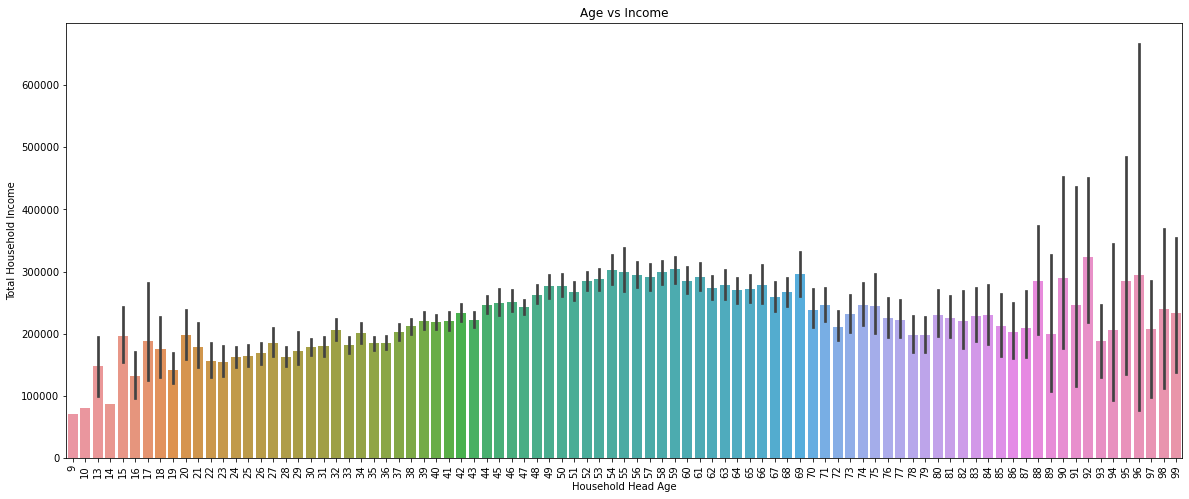

In [172]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['Household Head Age'],y=df['Total Household Income'])
plt.title('Age vs Income')
plt.xticks(rotation=90)
plt.show()

In [208]:
print(df.groupby(['Region'])['Total Household Income'].count())

Region
 ARMM                        2248
CAR                          1725
Caraga                       1782
I - Ilocos Region            2348
II - Cagayan Valley          2219
III - Central Luzon          3237
IVA - CALABARZON             4162
IVB - MIMAROPA               1249
IX - Zasmboanga Peninsula    1788
NCR                          4130
V - Bicol Region             2472
VI - Western Visayas         2851
VII - Central Visayas        2541
VIII - Eastern Visayas       2337
X - Northern Mindanao        1887
XI - Davao Region            2446
XII - SOCCSKSARGEN           2122
Name: Total Household Income, dtype: int64


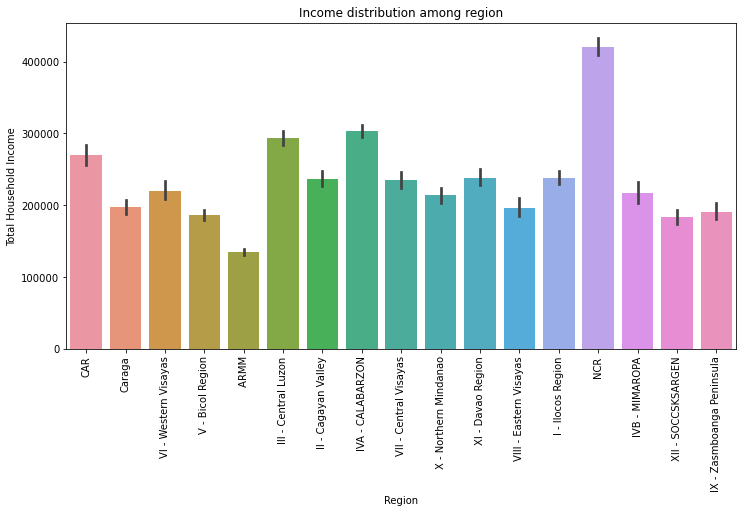

In [183]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Region'],y=df['Total Household Income'])
plt.xticks(rotation=90)
plt.title('Income distribution among region')
plt.show()

In [186]:
print(df.groupby(['Number of Car, Jeep, Van'])['Total Household Income'].count())

Number of Car, Jeep, Van
0    38876
1     2136
2      413
3       77
4       29
5       13
Name: Total Household Income, dtype: int64


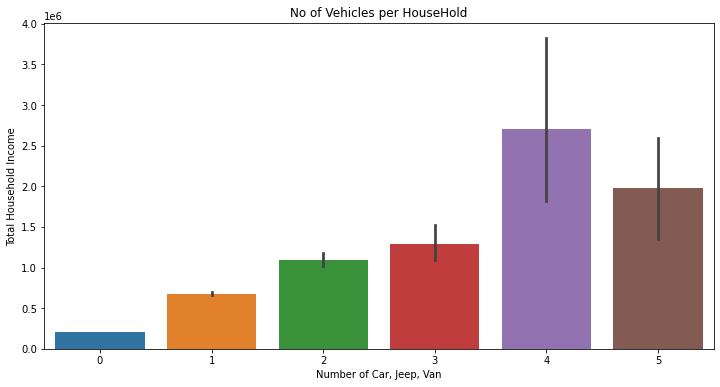

In [187]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Number of Car, Jeep, Van'],y=df['Total Household Income'])
plt.title('No of Vehicles per HouseHold')
plt.show()

In [213]:
print(df.groupby(['Number of Cellular phone'])['Total Household Income'].count())

Number of Cellular phone
0      6939
1     12484
2     10377
3      5820
4      3281
5      1467
6       666
7       242
8       153
9        49
10       66
Name: Total Household Income, dtype: int64


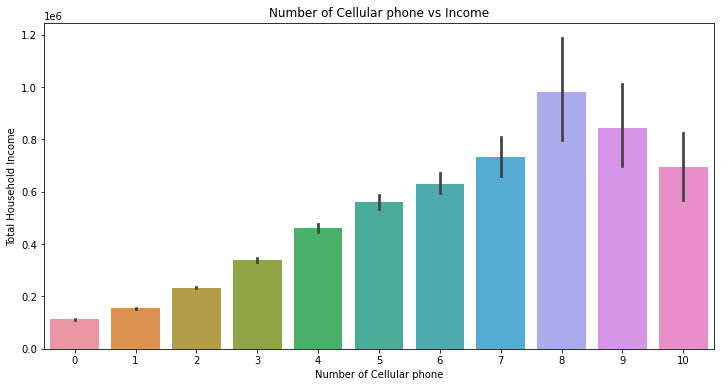

In [190]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Number of Cellular phone'],y=df['Total Household Income'])
plt.title('Number of Cellular phone vs Income')
plt.show()

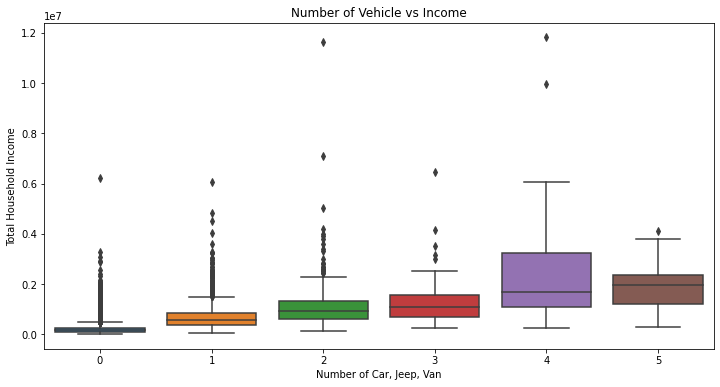

In [167]:
plt.figure(figsize=(12,6))
sns.boxplot(df['Number of Car, Jeep, Van'],df['Total Household Income'])
plt.title('Number of Vehicle vs Income')
plt.show()

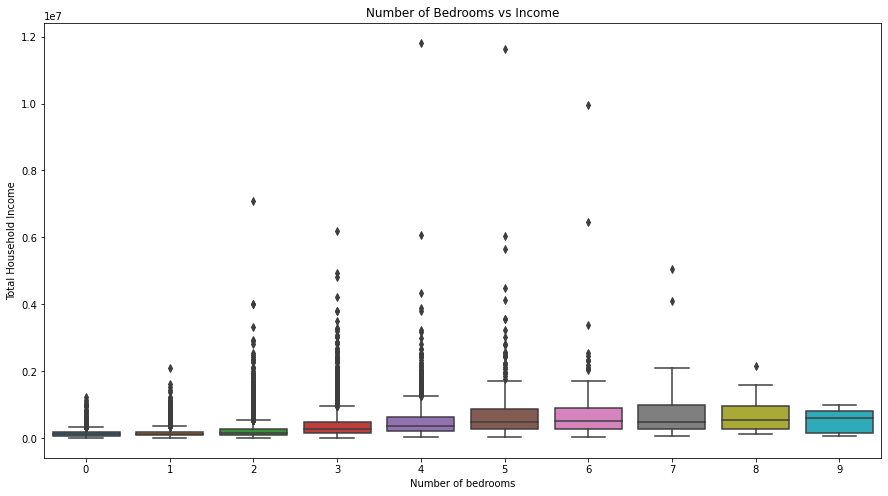

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(df['Number of bedrooms'],df['Total Household Income'])
plt.title('Number of Bedrooms vs Income')
plt.show()

In [215]:
df[df['Total Household Income']>10000000]

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
1238,11639365,VI - Western Visayas,280597,Other sources of Income,0,63182,37800,40551,41956,12475,...,2,0,4,2,1,8,4,1,0,2
2139,11815988,VI - Western Visayas,286736,Other sources of Income,0,37836,26796,27132,125802,6108,...,1,1,3,4,0,5,4,1,0,2


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

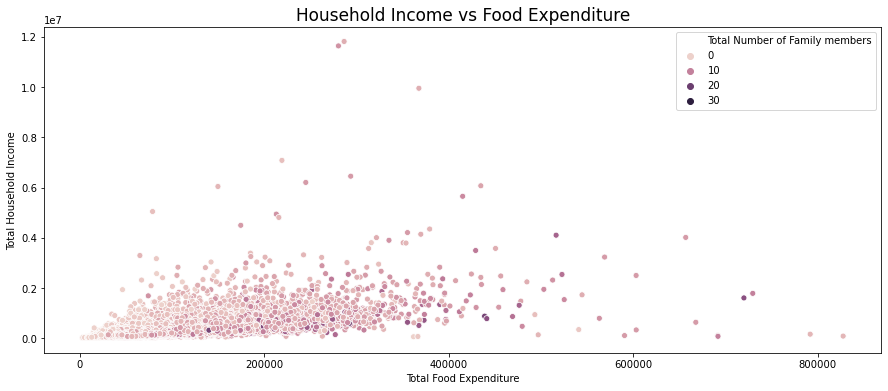

In [198]:
#plt.style.use('seaborn')
plt.figure(figsize=(15,6))
sns.scatterplot(x='Total Food Expenditure',y='Total Household Income',hue='Total Number of Family members', data = df)
plt.title('Household Income vs Food Expenditure',fontdict={'fontsize': 17})
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

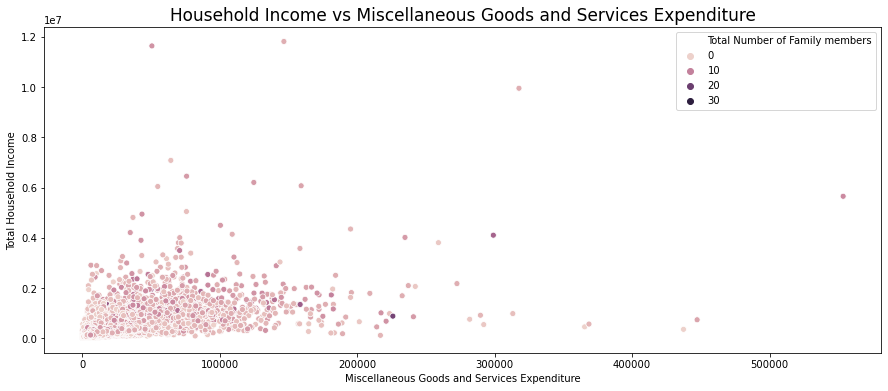

In [197]:
#plt.style.use('seaborn')
plt.figure(figsize=(15,6))
sns.scatterplot(x='Miscellaneous Goods and Services Expenditure',y='Total Household Income',hue='Total Number of Family members', data = df)
plt.title('Household Income vs Miscellaneous Goods and Services Expenditure',fontdict={'fontsize': 17})
plt.plot

### Categorize Income Level based on Total Income

In [19]:
# Income Level   Total Income
#    1          < 100,000
#    2          < 200,000
#    3          < 300,000
#    4          < 400,000
#    5          else        

In [20]:
# Function to add Income Level based on Total Household Income
def income_cat(row):
   if row['Total Household Income'] < 100000 :
      return 1
   if (row['Total Household Income'] >= 100000) & (row['Total Household Income'] < 200000) :
      return 2
   if (row['Total Household Income'] >= 200000) & (row['Total Household Income'] < 300000) :
      return 3
   if (row['Total Household Income'] >= 300000) & (row['Total Household Income'] < 400000) :
      return 4
   if row['Total Household Income'] >= 400000 :
      return 5

In [21]:
dfnum['Income Level'] = dfnum.apply (lambda row: income_cat(row), axis=1)

In [22]:
dfnum = dfnum.drop('Total Household Income', axis=1)
dfnum

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Income Level
0,117848,42140,38300,24676,16806,3325,13460,3000,0,0,4607,63636,3457,4776,2880,36200,34056,7200,19370,5
1,67766,17329,13008,17434,11073,2035,7833,2360,960,2132,8230,41370,3520,12900,5700,29300,9150,1500,0,2
2,61609,34182,32001,7783,2590,1730,3795,4545,270,4525,2735,14340,70,324,420,425,6450,500,0,1
3,78189,34030,28659,10914,10812,690,7887,6280,480,0,1390,16638,60,6840,660,300,3762,500,15580,2
4,94625,34820,30167,18391,11309,1395,11260,6400,1040,0,4620,31122,140,6996,2100,0,8472,1000,18887,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,44875,23675,21542,1476,6120,1632,3882,1805,0,133,1395,18372,294,2124,600,50,3978,2500,94120,2
41540,31157,2691,1273,1886,4386,1840,3110,9090,0,300,3136,17640,890,2568,1560,1550,6090,1500,78270,2
41541,45882,28646,27339,480,4796,1232,3025,3330,0,0,2460,9240,540,2040,1080,0,3570,500,54965,2
41542,81416,29996,26655,2359,17730,2923,7951,13660,0,630,3755,12438,314,2412,1020,5295,5760,1000,95785,2


In [23]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [24]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

# Fit your data on the scaler object
scaled_df = scaler.fit_transform(dfnum)
scaled_df = pd.DataFrame(scaled_df, columns=dfnum.columns)

In [25]:
scaled_df

,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,Tobacco Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Medical Care Expenditure,Transportation Expenditure,Communication Expenditure,Education Expenditure,Miscellaneous Goods and Services Expenditure,Special Occasions Expenditure,Crop Farming and Gardening expenses,Income Level
0,0.634209,1.262875,1.714337,1.346586,0.803456,0.260808,2.561435,-0.524641,-0.499018,-0.573838,-0.046372,0.475617,-0.137658,-0.363307,-0.166535,1.353816,1.227227,0.145659,0.116557,1.823825
1,-0.335671,-0.579574,-0.442380,0.656715,0.069595,-0.173577,0.856353,-0.551640,-0.057518,-0.040695,0.436926,0.056382,-0.135316,0.056517,0.219834,1.028634,-0.192176,-0.283576,-0.290007,-0.424891
2,-0.454907,0.671919,1.177204,-0.262638,-1.016284,-0.276281,-0.367233,-0.459465,-0.374846,0.557715,-0.296091,-0.452551,-0.263561,-0.593373,-0.503579,-0.332180,-0.346050,-0.358880,-0.290007,-1.174463
3,-0.133821,0.660632,0.892223,0.035620,0.036185,-0.626482,0.872716,-0.386273,-0.278268,-0.573838,-0.475510,-0.409283,-0.263933,-0.256646,-0.470697,-0.338071,-0.499240,-0.358880,0.037007,-0.424891
4,0.184476,0.719296,1.020814,0.747878,0.099804,-0.389086,1.894795,-0.381211,-0.020727,-0.573838,-0.044638,-0.136572,-0.260959,-0.248584,-0.273402,-0.352209,-0.230815,-0.321228,0.106419,-0.424891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,-0.778974,-0.108324,0.285337,-0.863442,-0.564421,-0.309280,-0.340870,-0.575052,-0.499018,-0.540579,-0.474843,-0.376635,-0.255234,-0.500354,-0.478918,-0.349853,-0.486930,-0.208271,1.685511,-0.424891
41540,-1.044635,-1.666582,-1.443055,-0.824386,-0.786384,-0.239240,-0.574800,-0.267732,-0.499018,-0.498818,-0.242599,-0.390417,-0.233080,-0.477410,-0.347388,-0.279161,-0.366566,-0.283576,1.352830,-0.424891
41541,-0.759473,0.260819,0.779663,-0.958321,-0.733902,-0.443973,-0.600557,-0.510720,-0.499018,-0.573838,-0.332775,-0.548576,-0.246090,-0.504695,-0.413153,-0.352209,-0.510182,-0.358880,0.863673,-0.424891
41542,-0.071327,0.361069,0.721337,-0.779328,0.921734,0.125441,0.892109,-0.074945,-0.499018,-0.416296,-0.160026,-0.488363,-0.254491,-0.485471,-0.421373,-0.102668,-0.385373,-0.321228,1.720458,-0.424891


#### Splitting the dataset for Training/Test

In [26]:
X = scaled_df.drop(['Income Level'], axis=1)
y = scaled_df['Income Level']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Feature Selection

In [28]:
## Use Forward Feature Selection to pick a good model
show_steps = False
included = []
best = {'feature': '', 'r2': 0, 'a_r2': 0}
model = LinearRegression()
n = X_test.shape[0]
while True:
    changed = False
    if show_steps:
        print('') 
    excluded = list(set(X.columns) - set(included))
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  
    for new_column in excluded:
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))
        fit = model.fit(X_train[included + [new_column]], y_train)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        k = len(included) + 1
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))
        if adjusted_r2 > best['a_r2']:
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    if changed:
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        break
print('')
print('Features:')
print(', '.join(included))

Added feature Total Food Expenditure with R^2 = 0.523 and adjusted R^2 = 0.523
Added feature Miscellaneous Goods and Services Expenditure with R^2 = 0.574 and adjusted R^2 = 0.574
Added feature Housing and water Expenditure with R^2 = 0.601 and adjusted R^2 = 0.601
Added feature Meat Expenditure with R^2 = 0.612 and adjusted R^2 = 0.611
Added feature Special Occasions Expenditure with R^2 = 0.620 and adjusted R^2 = 0.620
Added feature Medical Care Expenditure with R^2 = 0.624 and adjusted R^2 = 0.624
Added feature Communication Expenditure with R^2 = 0.627 and adjusted R^2 = 0.627
Added feature Crop Farming and Gardening expenses with R^2 = 0.629 and adjusted R^2 = 0.629
Added feature Education Expenditure with R^2 = 0.631 and adjusted R^2 = 0.631
Added feature Alcoholic Beverages Expenditure with R^2 = 0.632 and adjusted R^2 = 0.631
Added feature Clothing, Footwear and Other Wear Expenditure with R^2 = 0.632 and adjusted R^2 = 0.632
Added feature Tobacco Expenditure with R^2 = 0.633 a

#### Plot feature importance

In [29]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

Text(0.5, 1.0, 'Features Importance')

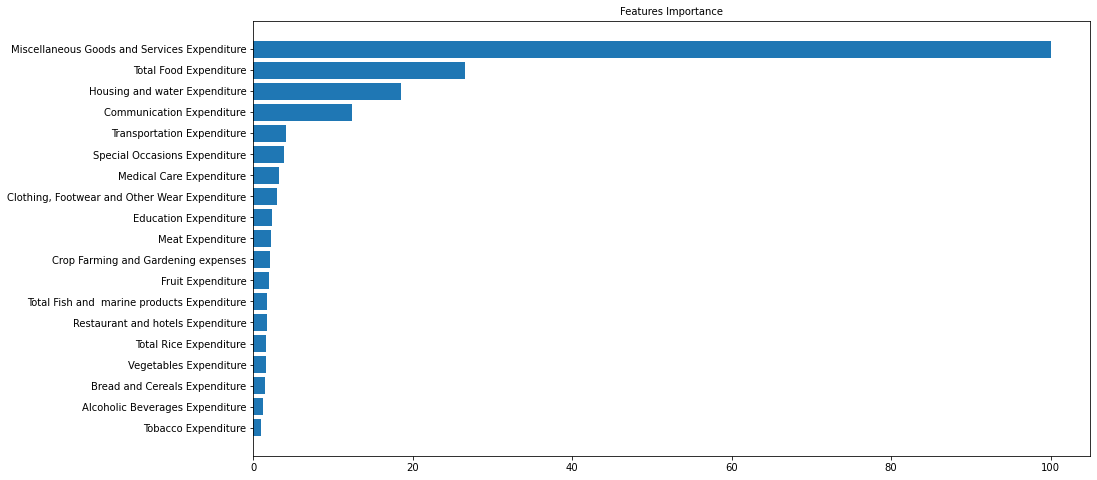

In [30]:
feature_importance = model_dt.feature_importances_
plt.figure(figsize=(15,8))
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx], fontsize=10)
plt.title('Features Importance', fontsize=10)

Random Forest to Determine Parameters

In [59]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
y_pred = rf_reg.predict(X_test)

In [63]:
rsqure_score = rf_reg.score(X_train,y_train)
print('R^2: {}'.format(rsqure_score))

R^2: 0.9753416311207876


In [69]:
#Perform the training using KFolds cross validation method
cv_r2_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[0.82492377 0.82502474 0.81768142 0.82958017 0.82360604]
Mean 5-Fold R Squared: 0.8241632315491934


In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Random Hyperparameter Grid

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}


### Use the random grid to search for best hyperparameters

In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 10, scoring='neg_mean_absolute_error', 
                              cv = 5, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 70.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

Best Parameter

In [85]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

Evaluate Random Search

In [86]:
rf_random.cv_results_

{'mean_fit_time': array([  47.54983907,  147.91691661, 1201.46178126,  516.88571029,
         975.50565767,  102.31018038, 1778.85026121,   31.63671126,
         630.78280745,  872.03633418]),
 'std_fit_time': array([  1.08323104,   2.25006328,  10.92649973, 311.32441359,
         23.94709698,   1.39739776,  43.31031935,   2.23815034,
         14.05523698,  95.74994757]),
 'mean_score_time': array([0.68271308, 1.2940968 , 1.17545443, 1.60999331, 1.93003545,
        0.83616209, 3.14857478, 0.36382589, 1.84745646, 1.76308165]),
 'std_score_time': array([0.02441393, 0.02546384, 0.07480009, 0.27980966, 0.14051907,
        0.03312281, 0.36224229, 0.07563999, 0.1469537 , 0.25235093]),
 'param_n_estimators': masked_array(data=[200, 377, 377, 733, 555, 288, 1000, 200, 644, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[10, 10,

Function Evaluation

In [87]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

Evaluate the Default Model

In [88]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

Model Performance
Average Error: 0.1192 degrees.
Accuracy = 99.94%.


Evaluate the Best Random Search Model

In [89]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 0.1358 degrees.
Accuracy = 100.52%.


In [90]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.58%.


Grid Search

In [127]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestRegressor(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [128]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 73.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 100.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 147.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, verbose=2)

In [129]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 1000}

Evaluate the Best Model from Grid Search

In [131]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train, y_train)

Model Performance
Average Error: 0.1977 degrees.
Accuracy = 101.02%.


In [132]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.08%.


Partial Dependence Plot (PDP)

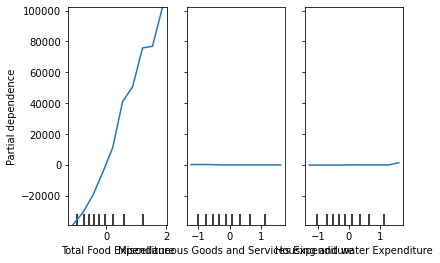

In [248]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor

def get_some_data():
    cols_to_use = ['Total Food Expenditure', 'Miscellaneous Goods and Services Expenditure', 
                   'Housing and water Expenditure']
    y3 = df['Total Household Income']
    X3 = df[cols_to_use]
    my_imputer = SimpleImputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y3

from sklearn.inspection import partial_dependence, plot_partial_dependence
X3, y3 = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X3, y3)
#fig = plt.figure(figsize(10, 9))
#fig.suptitle('Partial dependence of Household Income')
plot_partial_dependence(my_model,features=[0, 1, 2],
                        X=X3, 
                        feature_names=['Total Food Expenditure', 'Miscellaneous Goods and Services Expenditure', 
                        'Housing and water Expenditure'],
                        grid_resolution=10)


Thank you